# 6.3 Geospatial Analysis

#### Table of Contents

### 1. Importing Libraries

### 2. Importing Data

### 3. Choropleth Maps

#### 3a. Total Assets

#### 3b. Estimated Loss

#### 3c. Total Deposits

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import folium
import json

In [2]:
#Pathway to the Dataframes
path = r'C:\Users\Dallas\Desktop\Data Analyst - Projects\Data Immersion\Data Immersion A6\FDIC Bank Failure prediction'

In [3]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

## 2. Importing Data

In [4]:
#Importing prepared dataset
df = pd.read_csv(os.path.join(path, 'Datasets', 'Prepared Data', 'DS8_BankSuite_Failures_1934-2023_clean.csv'), index_col = False)

In [5]:
#First five rows of dataset
df.head()

,Unnamed: 0,Certification,Charter Class,City,State,Estimated Loss,Failure Date,FIN,ID,Bank Name,Total Assets,Total Deposits,Resolution,Transaction Type,Insurance Fund
0,1,57053,NM,NEW YORK,NY,2400000,2023-03-12,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF
1,2,24735,SM,SANTA CLARA,CA,16100000,2023-03-07,10539,4105,SILICON VALLEY BANK,209026000.0,175378000.0,FAILURE,PA,DIF
2,3,15426,NM,ALMENA,KS,16330,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF
3,4,16748,NM,FORT WALTON BEACH,FL,7247,2020-10-16,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF
4,5,14361,NM,BARBOURSVILLE,WV,45328,2020-04-03,10536,4102,THE FIRST STATE BANK,151808.0,143102.0,FAILURE,PA,DIF


In [6]:
#Remove duplicate index column
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
#Confirm removal of column
df.head()

,Certification,Charter Class,City,State,Estimated Loss,Failure Date,FIN,ID,Bank Name,Total Assets,Total Deposits,Resolution,Transaction Type,Insurance Fund
0,57053,NM,NEW YORK,NY,2400000,2023-03-12,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF
1,24735,SM,SANTA CLARA,CA,16100000,2023-03-07,10539,4105,SILICON VALLEY BANK,209026000.0,175378000.0,FAILURE,PA,DIF
2,15426,NM,ALMENA,KS,16330,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF
3,16748,NM,FORT WALTON BEACH,FL,7247,2020-10-16,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF
4,14361,NM,BARBOURSVILLE,WV,45328,2020-04-03,10536,4102,THE FIRST STATE BANK,151808.0,143102.0,FAILURE,PA,DIF


In [8]:
df.shape

(3468, 14)

In [9]:
# Import ".json" file for the U.S. 
country_geo = r'C:\Users\Dallas\Desktop\Data Analyst - Projects\Data Immersion\Data Immersion A6\FDIC Bank Failure prediction\Datasets\Original Data\us-states.json'

In [10]:
country_geo

'C:\\Users\\Dallas\\Desktop\\Data Analyst - Projects\\Data Immersion\\Data Immersion A6\\FDIC Bank Failure prediction\\Datasets\\Original Data\\us-states.json'

In [11]:
# That's just in case you want to look at the JSON file contents here too:
f = open(r'C:\Users\Dallas\Desktop\Data Analyst - Projects\Data Immersion\Data Immersion A6\FDIC Bank Failure prediction\Datasets\Original Data\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

## 3. Choropleth Maps

### 3a. Total Assets

In [12]:
#Replace "MAUI, HI" with "HI"
df = df.replace(to_replace="MAUI, HI", value="HI")

In [13]:
#Plot the State with its sum of Total Assets
data_to_plot_assets = df[['State', 'Total Assets']]

In [14]:
data_to_plot_assets.head()

,State,Total Assets
0,NY,110363650.0
1,CA,209026000.0
2,KS,65733.0
3,FL,136566.0
4,WV,151808.0


In [15]:
#to see if there are extreme values to consider
data_to_plot_assets.describe()

,Total Assets
count,3.468000e+03
mean,5.599016e+05
std,6.740647e+06
min,1.731000e+03
25%,2.487300e+04
50%,6.876950e+04
75%,2.203200e+05
max,3.070216e+08


{'whiskers': [<matplotlib.lines.Line2D at 0x26de252f2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x26de252d810>,
 'boxes': [<matplotlib.lines.Line2D at 0x26de252e740>],
 'medians': [<matplotlib.lines.Line2D at 0x26de252c550>],
 'fliers': [<matplotlib.lines.Line2D at 0x26de252d2d0>],
 'means': []}

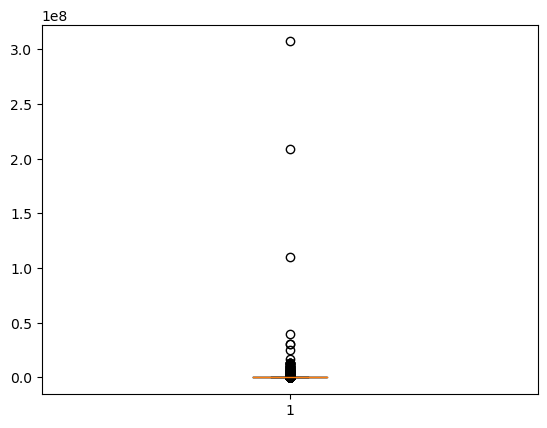

In [16]:
#Created BoxPlot to visualize extreme outliers
plt.boxplot(data_to_plot_assets['Total Assets'])

### Observation:  There are some extreme outliers that could be skewing results.  This could cause the map to misrepresent where total assets typical are within the US.

{'whiskers': [<matplotlib.lines.Line2D at 0x26de2895b40>,
 'caps': [<matplotlib.lines.Line2D at 0x26de2589510>,
 'boxes': [<matplotlib.lines.Line2D at 0x26de28958a0>],
 'medians': [<matplotlib.lines.Line2D at 0x26de2895f90>],
 'fliers': [],
 'means': []}

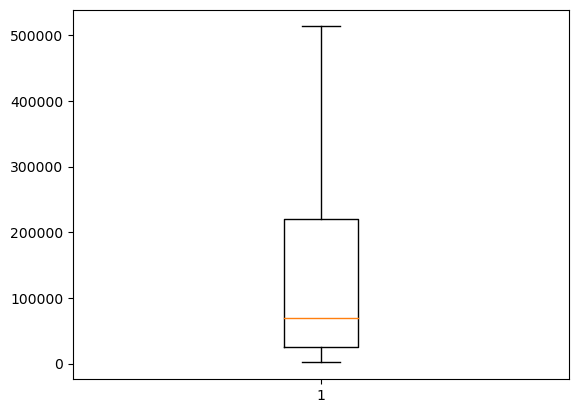

In [17]:
#Created BoxPlot without outliers
plt.boxplot(data_to_plot_assets['Total Assets'], showfliers=False)

In [18]:
#df to group the states by the sum of total assets per state
bank_group_by_state = data_to_plot_assets.groupby(['State'], as_index=False)['Total Assets'].sum()

In [19]:
bank_group_by_state.head()

,State,Total Assets
0,AK,3.351116e+06
1,AL,3.613102e+07
2,AR,8.790065e+06
3,AZ,2.257538e+07
4,CA,4.560679e+08


In [20]:
#Setup a folium map at a high-level zoom; Using Total Assets
map = folium.Map(location = [100,0], zoom_start = 2.2)

#Choropleth maps ind Pandas df and .json geomatries.  Allos us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = bank_group_by_state,
    columns = ['State', 'Total Assets'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr', fill_opacity = 0.6, line_opacity = 0.1,
    legend_name = "Total Assets").add_to(map)
folium.LayerControl().add_to(map)

map

### 3b. Estimated Loss

In [21]:
#Plot the State with its sum of Estimated Loss
data_to_plot_loss = df[['State', 'Estimated Loss']]

In [22]:
data_to_plot_loss.head()

,State,Estimated Loss
0,NY,2400000
1,CA,16100000
2,KS,16330
3,FL,7247
4,WV,45328


In [23]:
#df to group the states by the sum of Estimated Loss per state
bank_group_by_state_EL = data_to_plot_loss.groupby(['State'], as_index=False)['Estimated Loss'].sum()

In [24]:
bank_group_by_state_EL.head()

,State,Estimated Loss
0,AK,832506
1,AL,3684298
2,AR,5086429
3,AZ,5700651
4,CA,52909014


{'whiskers': [<matplotlib.lines.Line2D at 0x26de30ab730>,
 'caps': [<matplotlib.lines.Line2D at 0x26de30abc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x26de30ab490>],
 'medians': [<matplotlib.lines.Line2D at 0x26de30d81f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26de30d8490>],
 'means': []}

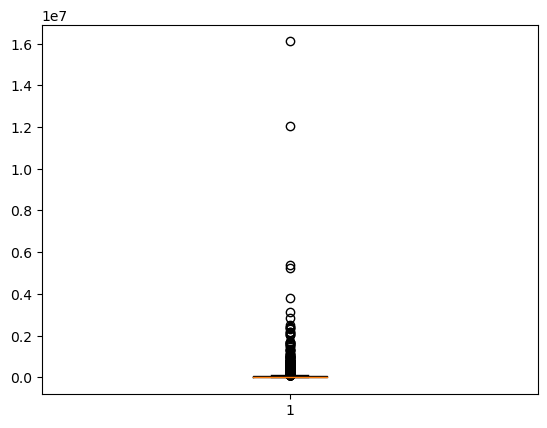

In [25]:
#Created BoxPlot to visualize extreme outliers
plt.boxplot(data_to_plot_loss['Estimated Loss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26de3154700>,
 'caps': [<matplotlib.lines.Line2D at 0x26de3154c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x26de3154460>],
 'medians': [<matplotlib.lines.Line2D at 0x26de3155180>],
 'fliers': [],
 'means': []}

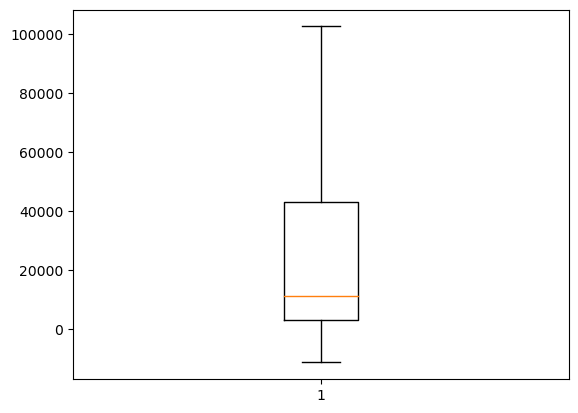

In [26]:
#Created BoxPlot without outliers
plt.boxplot(data_to_plot_loss['Estimated Loss'], showfliers=False)

In [27]:
#Setup a folium map at a high-level zoom; Using Estimated Losses
map = folium.Map(location = [100,0], zoom_start = 2.2)

#Choropleth maps ind Pandas df and .json geomatries.  Allos us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = bank_group_by_state_EL,
    columns = ['State', 'Estimated Loss'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr', fill_opacity = 0.6, line_opacity = 0.1,
    legend_name = "Estimated Loss").add_to(map)
folium.LayerControl().add_to(map)

map

### 3c. Total Deposits

In [28]:
#Plot the State with its sum of Total Deposits
data_to_plot_dep = df[['State', 'Total Deposits']]

In [29]:
data_to_plot_dep.head()

,State,Total Deposits
0,NY,88612911.0
1,CA,175378000.0
2,KS,64941.0
3,FL,133936.0
4,WV,143102.0


In [30]:
#df to group the states by the sum of Total Deposits per state
bank_group_by_state_dep = data_to_plot_dep.groupby(['State'], as_index=False)['Total Deposits'].sum()

In [31]:
bank_group_by_state_dep.head()

,State,Total Deposits
0,AK,3.199220e+06
1,AL,2.896028e+07
2,AR,8.070281e+06
3,AZ,1.825167e+07
4,CA,3.531210e+08


{'whiskers': [<matplotlib.lines.Line2D at 0x26de43a3880>,
 'caps': [<matplotlib.lines.Line2D at 0x26de43a3dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26de43a35e0>],
 'medians': [<matplotlib.lines.Line2D at 0x26de4198340>],
 'fliers': [<matplotlib.lines.Line2D at 0x26de41985e0>],
 'means': []}

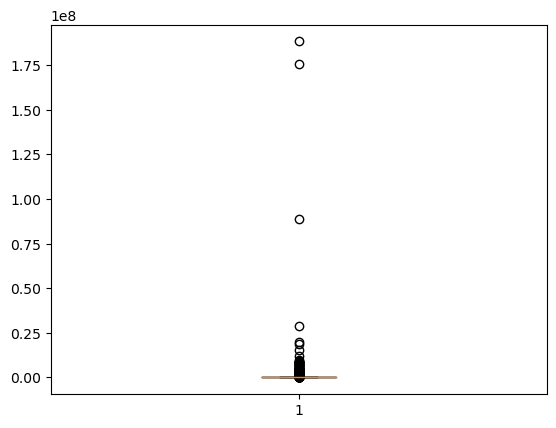

In [32]:
#Created BoxPlot to visualize extreme outliers
plt.boxplot(data_to_plot_dep['Total Deposits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26de41dfc10>,
 'caps': [<matplotlib.lines.Line2D at 0x26de4204070>,
 'boxes': [<matplotlib.lines.Line2D at 0x26de41df970>],
 'medians': [<matplotlib.lines.Line2D at 0x26de42045b0>],
 'fliers': [],
 'means': []}

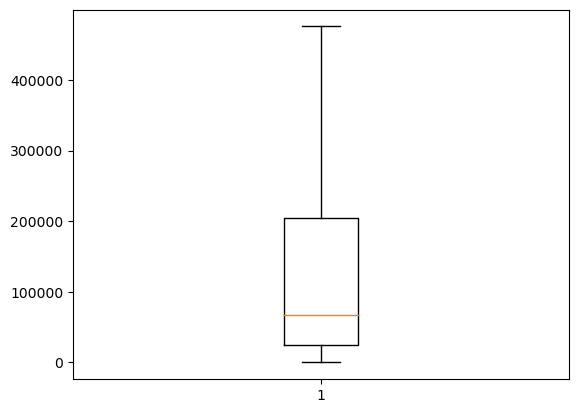

In [33]:
#Created BoxPlot without outliers
plt.boxplot(data_to_plot_dep['Total Deposits'], showfliers=False)

In [34]:
#Setup a folium map at a high-level zoom; Using Total Deposits
map = folium.Map(location = [100,0], zoom_start = 2.2)

#Choropleth maps ind Pandas df and .json geomatries.  Allos us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = bank_group_by_state_dep,
    columns = ['State', 'Total Deposits'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr', fill_opacity = 0.6, line_opacity = 0.1,
    legend_name = "Total Deposits").add_to(map)
folium.LayerControl().add_to(map)

map

### Observations:  While the maps showing Total Assets and Total Deposits are relatively similar, The Estimated Losses are grouped slightly differently than expected.  The most Deposits/Assets are located in California, followed by Nevada, Texas and New York, and lastly Illinois and Florida.  

### The Estimated losses, however, Are primarily only in Texas first, California second and Florida third, with comparatively little losses relative to these three anywhere else in the country.  While these three did comprise some of the larger asset/deposit totals, why did Texas see the most losses?  Why were there very little in New York?  

### What kinds of institutions were most prominent in these states to have explained these differences?
### What kinds of transactions took place?
### Who were the insurers of these financial institutions?
### What years carried the greatest number of failures and where? 